# Data Science TP4 - LDA 
Ning, Tien-Tso

# Data set up

In [1]:
#Ning
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

In [2]:
#load MNIST dataset
(training_set, labels), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
all_images = np.reshape(training_set, (60000,784))
print(len(all_images))
print(all_images.shape)

60000
(60000, 784)


In [3]:
our_images = []
our_labels = []

threes_sevens = np.isin(labels, [3,7])
for i in range(0, len(labels)):
    if(threes_sevens[i]):
        our_images.append(all_images[i])
        our_labels.append(labels[i])
        
our_images = our_images[0:2000]
our_labels = our_labels[0:2000]

X = our_images[:]
y = our_labels[:]
print(X[0].shape)

(784,)


In [4]:
pca = PCA(n_components=50)
pca_onX = pca.fit(X)
PC = pca_onX.components_
print(PC.shape)
x_bar = np.mean(X, axis=0)

(50, 784)


In [5]:
def reconstruct(x_i, m, x_bar, PC):
    '''
    reconstruct x_i from X, where x_i is a len 784 vector image.
    '''
    recon = np.zeros((784,))
    for j in range(0, m):
        recon += np.inner((x_i-x_bar), PC[j])*PC[j]
    recon = recon + x_bar
    return recon

In [6]:
recon_X = []
for i in range(0, len(X)):
    recon_X.append(reconstruct(X[i], 50, x_bar, PC))

print(len(recon_X))

2000


In [7]:
lda = LinearDiscriminantAnalysis()
LDA = lda.fit(recon_X, y) #using reconstructed X

/home/kense/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [8]:
threes_sevens = np.isin(y_test, [3,7])

X_test = x_test[threes_sevens]
Y_test = y_test[threes_sevens]
X_test = X_test[0:2000]
Y_test = Y_test[0:2000]
X_test = np.reshape(X_test, (2000,784))


print(len(X_test))
print(X_test[0].shape)

2000
(784,)


In [9]:
x_bar_test = np.mean(X_test, axis=0)
recon_X_test = []
for i in range(0, len(X_test)):
    recon_X_test.append(reconstruct(X_test[i], 50, x_bar_test, PC))
print(len(recon_X_test))

2000


In [10]:
pred = []
for i in range(0, len(recon_X_test)):
    pred.append(LDA.predict([recon_X_test[i]])[0])
print(len(pred))

2000


# LDA applied classification - Confusion Matrix

In [11]:
print(confusion_matrix(Y_test,pred))

[[971  23]
 [ 28 978]]


# k-NN classification - Confusion Matrix

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
KNN = knn.fit(X,y)

In [13]:
knn_pred = []
for i in range(0, len(recon_X_test)):
    knn_pred.append(KNN.predict([recon_X_test[i]])[0])

print(confusion_matrix(Y_test,knn_pred))

[[ 978   16]
 [   3 1003]]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
print(accuracy_score(Y_test, knn_pred))

0.9745
0.9905


It would appear that the k-NN classification still provides a slightly better accuracy when applied to the images.

In [15]:
from sklearn.cluster import KMeans
KMEANS2 = KMeans(n_clusters = 2).fit(recon_X_test)

In [28]:
centers = []
for k in range(2, 11):
    KMEANS = KMeans(n_clusters = k).fit(recon_X_test)
    centers.append(KMEANS.cluster_centers_)

In [107]:
np.linalg.norm(recon_X_test[333]-centers[8][5])**2

1348994.1788250275

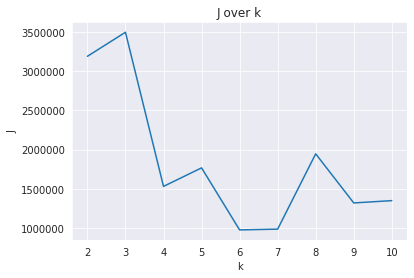

In [109]:
x = [2,3,4,5,6,7,8,9,10]
y = [3186569.440764004, 3492874.8093029126, 1530246.109457306, 1766199.3291345693, 976182.5327687545, 986087.0737272679, 1944985.804599274, 1319632.520682386, 1348994.1788250275]
data = pd.DataFrame({"x":x, "y":y})
f = plt.figure()
with sb.axes_style("darkgrid"):
    ax = sb.lineplot(x="x", y="y", data=data)
    ax.title.set_text("J over k")
    ax.set(xlabel="k", ylabel="J")

As the number of clusters k increases, we should see that the distance of points to their respective cluster center should decrease, since there are more defined areas or clusters to be a part of. Take the trivial case of two clusters of data, with k = 1. We can immediately tell that the k will be between the two clusters, and the distance will be the mean. However, if we increase k = 2, we can tell that the k values will eventually shift to be the centers of the two respective cluster's centers, and the distance J will be shorter.

In [19]:
Y_new = []
for i in range(0, len(Y_test)):
    if Y_test[i] == 3:
        Y_new.append(0)
    else:
        Y_new.append(1)

In [20]:
kmeans_pred = KMEANS2.labels_
print(confusion_matrix(Y_new, kmeans_pred))

[[945  49]
 [ 22 984]]


In [21]:
threes_fives = np.isin(y_test, [3,5])

X_35s = x_test[threes_fives]
Y_35s = y_test[threes_fives]
X_35s = np.reshape(X_35s, (1902,784))
Y_35s = Y_35s[0:1902]

print(len(X_35s))
print(X_35s[0].shape)

1902
(784,)


In [22]:
pca = PCA(n_components=50)
pca_onX = pca.fit(X_35s)
PC = pca_onX.components_
x_bar = np.mean(X, axis=0)
x_bar_35s = np.mean(X_35s, axis=0)
recon_35s = []
for i in range(0, len(X_35s)):
    recon_35s.append(reconstruct(X_35s[i], 50, x_bar_35s, PC))
print(len(recon_35s))

1902


In [23]:
KMEANS35 = KMeans(n_clusters = 2).fit(recon_35s)

In [24]:
Y_new_35s = []
for i in range(0, len(Y_35s)):
    if Y_35s[i] == 3:
        Y_new_35s.append(1)
    elif Y_35s[i] == 5:
        Y_new_35s.append(0)

kmeans_pred_35s = KMEANS35.labels_
print(confusion_matrix(Y_new_35s, kmeans_pred_35s))

[[547 345]
 [187 823]]


The 3-7s problem is a lot easier to classify than the 3-5s problem because from the images, we can tell that the images for 3s and 5s share closer features, and thus would be closer together and harder to separate between clusters. This means that overall the 3-5s problem, we see a lot more mis-classified points compared to the 3-7s problem.